# Baseline with AutoML

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from jcopml.plot import plot_missing_value
from jcopml.automl import AutoClassifier

## Load Data

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
df.shape

(4250, 20)

In [4]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

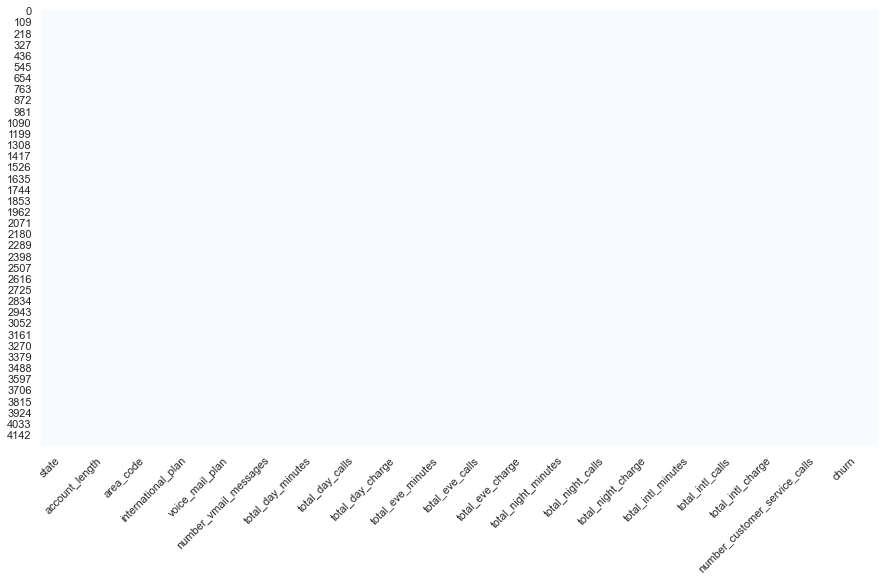

In [5]:
plot_missing_value(df, feature_alignment='vertical')

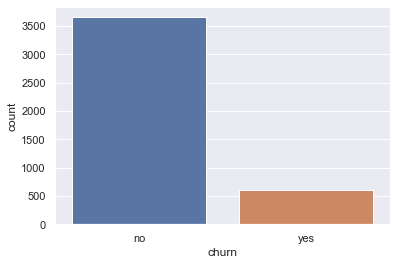

In [6]:
sns.countplot(df.churn);

In [7]:
df.churn.value_counts(normalize=True)

no     0.859294
yes    0.140706
Name: churn, dtype: float64

Gunakan f1 score

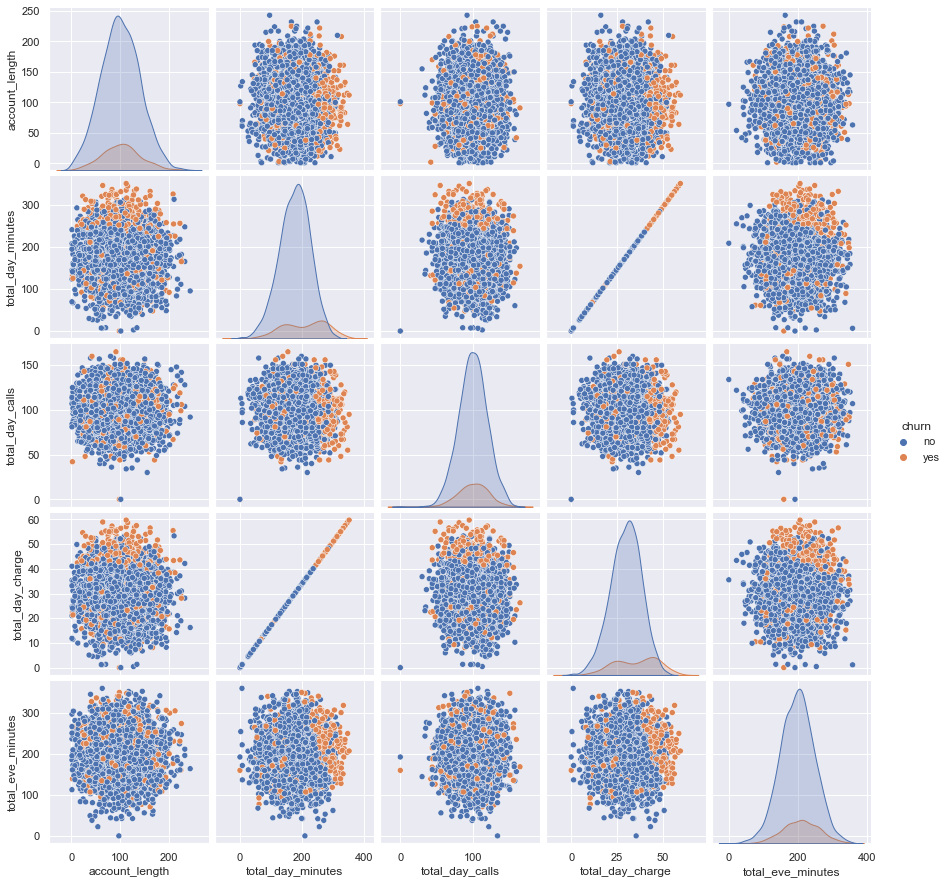

In [8]:
sns.pairplot(df, hue='churn', vars=['account_length','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes']);

In [9]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
df.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [11]:
# mapping 
df['churn'] = df.churn.map({'no': 0, 'yes': 1})
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## Dataset Splitting

In [12]:
X = df.drop(columns="churn")
y = df.churn

X.shape

(4250, 19)

## Modeling

In [13]:
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [14]:
# filter fitur numerik dan categoric 
numeric = list(X.dtypes[X.dtypes != 'object'].index)
categoric = list(X.dtypes[X.dtypes == 'object'].index)

In [15]:
model = AutoClassifier(numeric, categoric)

In [16]:
model.fit(X, y, cv=5, scoring='f1')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.9min finished


================== Best Model Info ==================
algo                      | RandomForestClassifier
algo__max_depth           | 71
algo__max_features        | 0.36500400286262713
algo__min_samples_leaf    | 1
algo__n_estimators        | 166

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_indicator=True, strategy='mean')
numerical_scaler          | StandardScaler

=========== Score ===========
Train: 1.0
Valid: 0.827768713222697
Test : 0.832535885167464


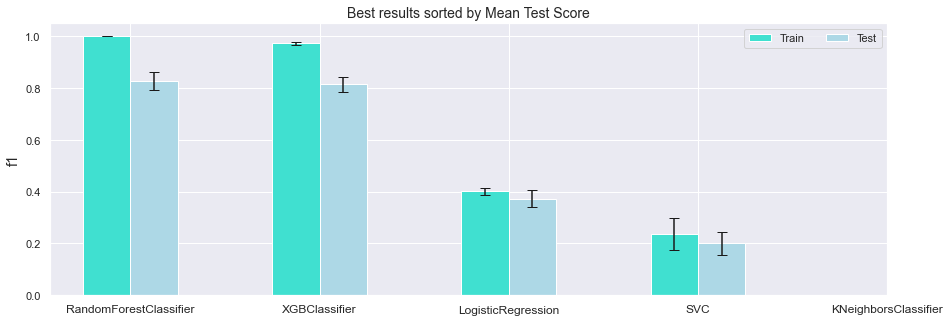

In [17]:
model.plot_results()

## Features Important

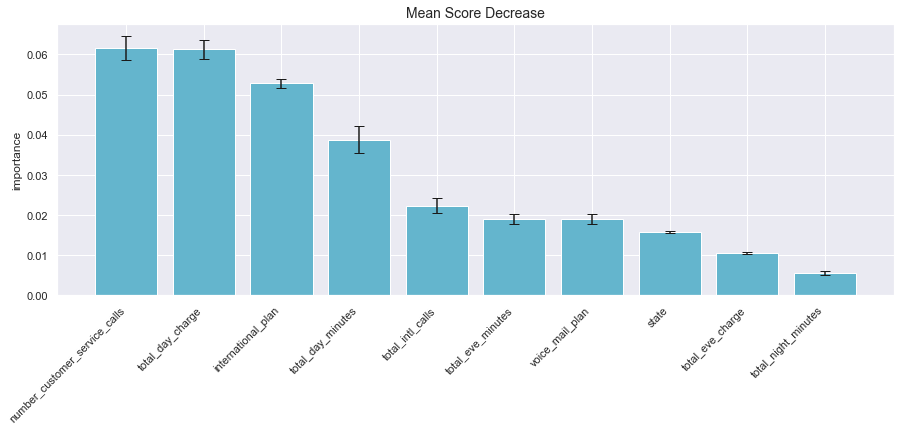

In [18]:
model.mean_score_decrease()

In [19]:
df_imp = model.mean_score_decrease(plot=False, topk=19)

In [105]:
feat_imp = list(df_imp.feature[:15])

In [106]:
numeric2 = list(X[feat_imp].dtypes[X[feat_imp].dtypes != 'object'].index)

In [108]:
categoric2 = list(X[feat_imp].dtypes[X[feat_imp].dtypes == 'object'].index)

In [110]:
model = AutoClassifier(numeric2, categoric2)

In [111]:
model.fit(X, y, cv=5, scoring='f1', algo=['xgb'])

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.8min finished


[11:47:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
================== Best Model Info ==================
algo                      | XGBClassifier
algo__colsample_bytree    | 0.9061872361061676
algo__gamma               | 1
algo__learning_rate       | 0.04253162363790871
algo__max_depth           | 4
algo__n_estimators        | 193
algo__reg_alpha           | 0.003608492588402667
algo__reg_lambda          | 0.26161914205169623
algo__subsample           | 0.5699205456508366

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(

## Polynomial Features

In [112]:
model.fit(X, y, cv=5, scoring='f1', algo=['xgb'], poly=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 20.3min finished


[12:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
================== Best Model Info ==================
algo                      | XGBClassifier
algo__colsample_bytree    | 0.7584829797696763
algo__gamma               | 4
algo__learning_rate       | 0.055467190863329574
algo__max_depth           | 7
algo__n_estimators        | 195
algo__reg_alpha           | 0.023078849815277983
algo__reg_lambda          | 5.284809078673605
algo__subsample           | 0.729206375921506

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(ad

## Evaluation

In [114]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix

In [115]:
X_train = model.X_train
y_train = model.y_train
X_test = model.X_test
y_test = model.y_test

In [116]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2922
           1       1.00      0.86      0.92       478

    accuracy                           0.98      3400
   macro avg       0.99      0.93      0.96      3400
weighted avg       0.98      0.98      0.98      3400


Test report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       730
           1       0.98      0.79      0.88       120

    accuracy                           0.97       850
   macro avg       0.97      0.89      0.93       850
weighted avg       0.97      0.97      0.97       850



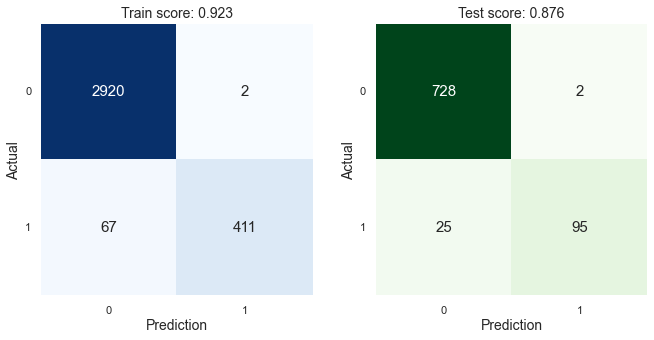

In [117]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model.model)

## Save Model

In [125]:
model.save(fname='churn_bsl_xgb.pkl')

Model is pickled as model/churn_bsl_xgb.pkl
